# Algorithm comparison

In this notebook, we are going to compare the different algorithms of **selection**: finding the i-th order statistic in a list in regards of the time complexity. The 5 algorithms that we are going to compare are the following:
* Two algorithms of sorting reduction, i.e. sorting the list first and extract the i-th element, with a complexity **O(nln(n))**
    1. **quick_sort_reduction**: using the **quick_sort algorithm**
    2. **built_in_sort_reduction**: using the Python built-in method `sorted` for lists


* Three algorithms that use the **divide to conquer** paradigm to obtain a **O(n)** time complexity. The three algorithms will differ in there way to choose the pivot
    3. **first_element_selection**: choosing the first element of the list for the pivot
    4. **randomized_selection**: choosing a random element of the list for the pivot
    5. **deterministic_selection**: choosing the pivot with the method of **Median of Medians**

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

## Sorting reduction algorithms

Let's first compare the sorting reduction algorithms, namely: **quick_sort_reduction** and **built_in_sort_reduction**.

In [2]:
from selection_algorithms.sorting_reduction import quick_sort_reduction, built_in_sort_reduction
from compare_algos.collection_algos import CollectionAlgosListIndex

In [13]:
sorting_reduction_collection = CollectionAlgosListIndex(quick_sort_reduction, 
                                                     built_in_sort_reduction)

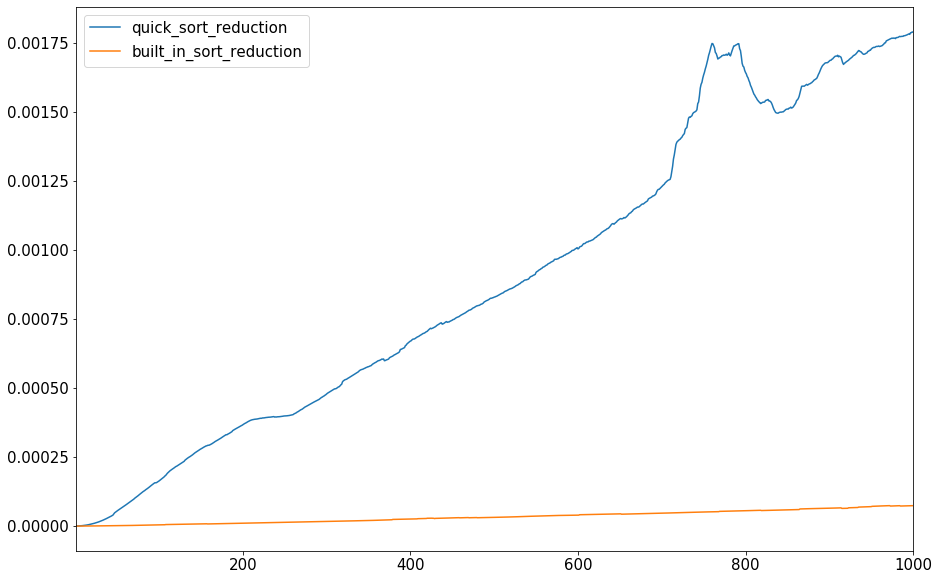

In [16]:
sorting_reduction_collection.calculate_time_multiple_lists(range_length=1000, 
                                                           harmonization=True, 
                                                          f_harmonization=50).plot(figsize=(15, 10))                                             

😮 It is pretty straightforward. The **built-in** sorted method of Python for list outperforms the **quick_sort** algorithm. As a result, **built_in_sort_reduction** seems to be a really good algorithm for the **selection problem** even though as any sorting-reduction algorithm its time complexity has a lower bound of **O(nln(n))** as we cannot sort a list faster than that.

Let's run **built_in_sort_reduction** to see how it goes for bigger sized lists... <br>
It can take a bit long to run (two cells below), prepare to wait, around 2 minutes on my CPU.<br>
*Uncomment to run*

In [29]:
from complexity_evaluation.output_algo import AlgoAnalysisListIndex

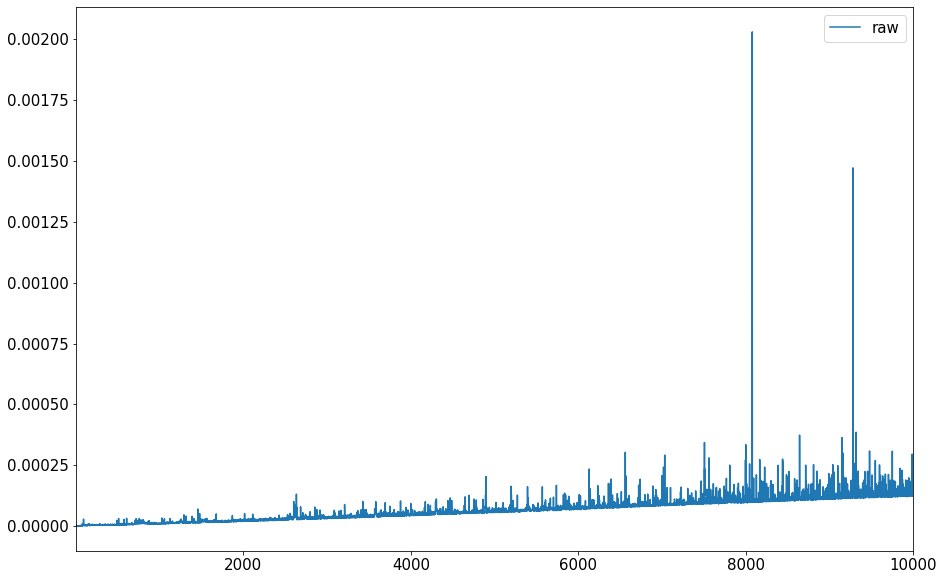

In [30]:
built_in_analysis = AlgoAnalysisListIndex(built_in_sort_reduction)
# built_in_analysis.calculate_time_multiple_lists(range_length=int(1e4)).plot(figsize=(15, 10))                

As you can see, with no harmonization of the results there can be a lot of noise, with high pics sometimes, but even these pics seem to be 10 times faster than a normal **quick_sort** based reduction algorithm.

## Divide to conquer algorithms

### 1. first pivot vs. random pivot

Let's compare the algorithm with the choice of the pivot being the first element with an algorithm with a random pivot.

In [3]:
from selection_algorithms.first_element_selection import selection_first_element
from selection_algorithms.randomized_selection import randomized_selection

In [12]:
first_vs_random = CollectionAlgosListIndex(selection_first_element, 
                                            randomized_selection)


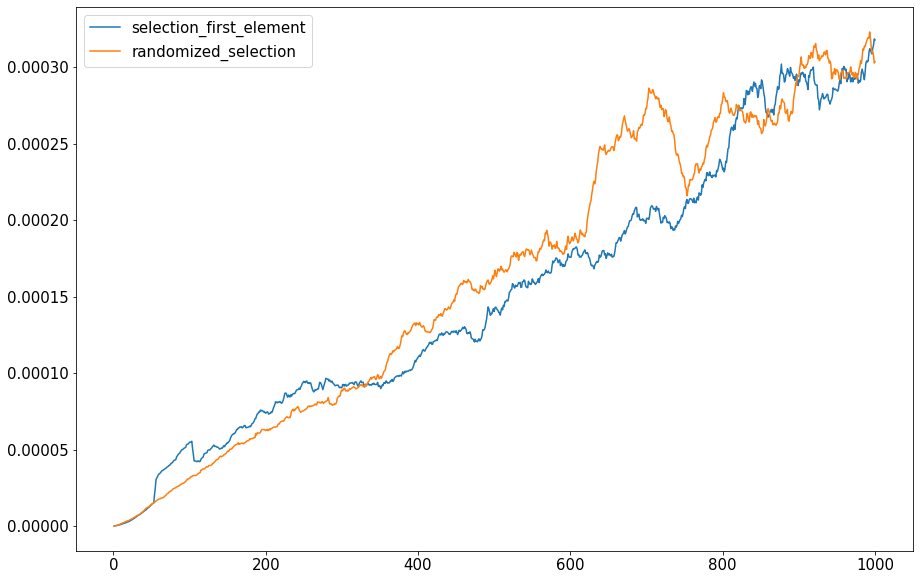

In [14]:
first_vs_random.calculate_time_multiple_lists(range_length=1000,
                                             harmonization=True, 
                                             f_harmonization=50).plot(figsize=(15, 10))

The results are pretty similar. Anyway we will prefer the **randomized_selection**.<br>
If the list is sorted (or reversely sorted) the **selection_first_element** is terrible

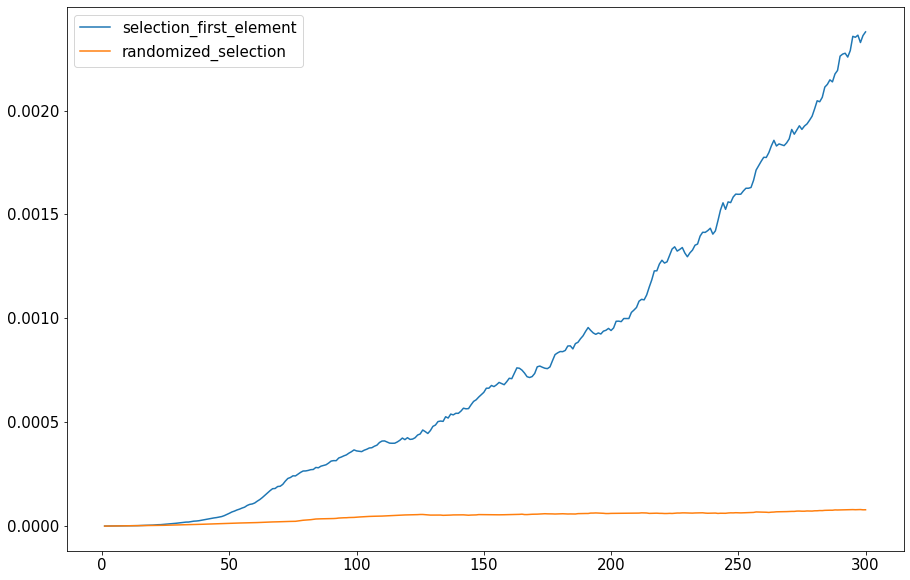

In [16]:
first_vs_random.calculate_time_multiple_lists(range_length=300,
                                             harmonization=True, 
                                             f_harmonization=50, 
                                              worst_case=True).plot(figsize=(15, 10))

### 2. Deterministic vs randomized

It is finally time to see which strategy on how to choose pivot to split the list is the most performant between:
* the simple **random selection** of an element of the list and
* the elaborated **deterministic approach** using the **median of medians**.

It seems that the split is in general better with the **median of medians** strategy. But this recursive method can be a bit heavy to compute. Let's check out if choosing this method is worth it.

In [24]:
from selection_algorithms.deterministic_selection import deterministic_selection
from selection_algorithms.randomized_selection import randomized_selection

In [25]:
deterministic_vs_randomized = CollectionAlgosListIndex(deterministic_selection, 
                                                     randomized_selection)

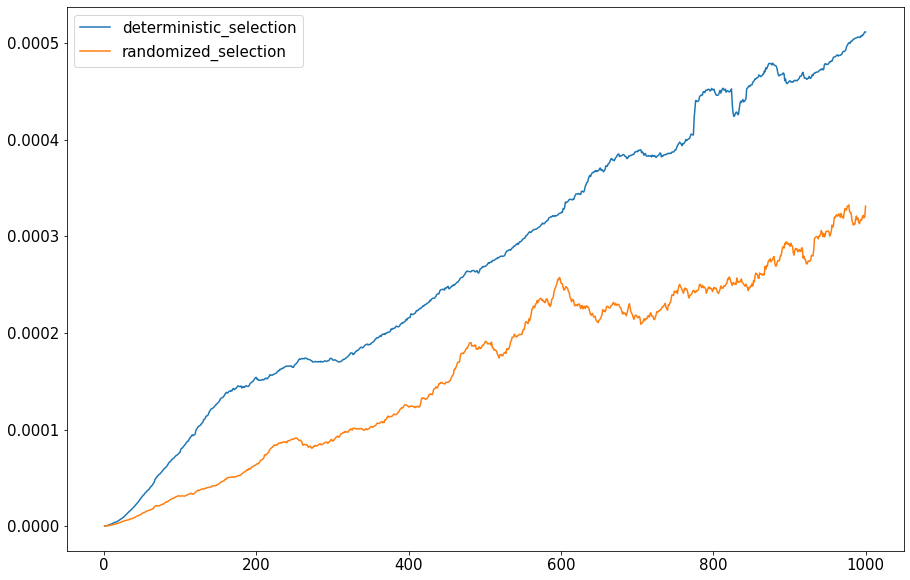

In [27]:
deterministic_vs_randomized.calculate_time_multiple_lists(range_length=1000,
                                             harmonization=True, 
                                             f_harmonization=50).plot(figsize=(15, 10))

The simple randomized selection beats the deterministic selection....<br>
The **median of medians** idea was interesting though...

## Sorting reduction vs randomized

In this part, we are going to highlight the difference of time complexity between an algorithm in **O(nln(n))**: a sorting reduction solution and an algorithm in **O(n)**: **randomized_selection**.

In [31]:
sorting_reduction_vs_randomized = CollectionAlgosListIndex(quick_sort_reduction,
                                                     randomized_selection)

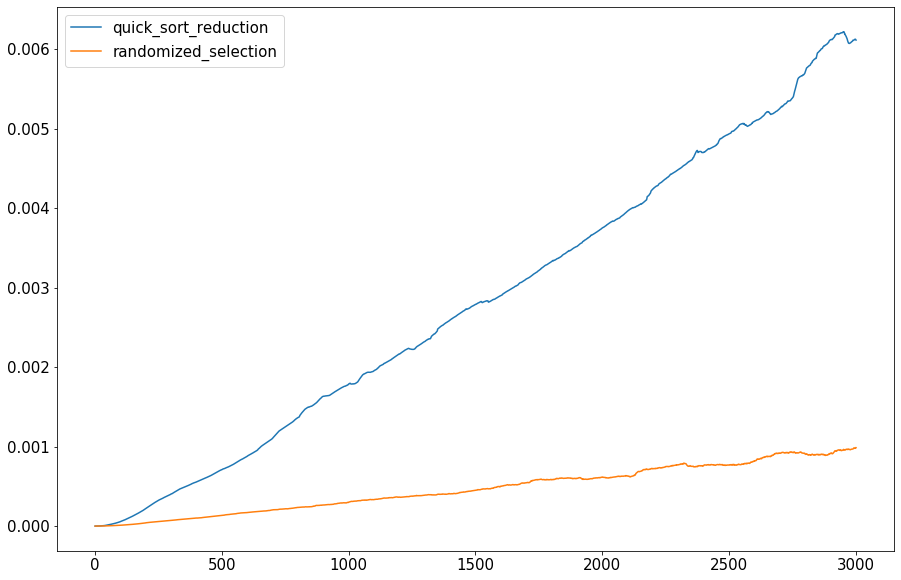

In [33]:
sorting_reduction_vs_randomized.calculate_time_multiple_lists(range_length=2000,
                                                             harmonization=True,
                                                             f_harmonization=200).plot(figsize=(15, 10))

We can easily see that the **randomized selection**  has a flatter shape than that of **quick_sort_reduction**. This highlights the difference between a linear and a **O(nln(n))**
time complexity..

Finally, let' compare our two best solutions namely:
1. **randomized_selection**
2. **built-in_sort_reduction**

In [36]:
built_in_vs_randomized = CollectionAlgosListIndex(built_in_sort_reduction, randomized_selection)

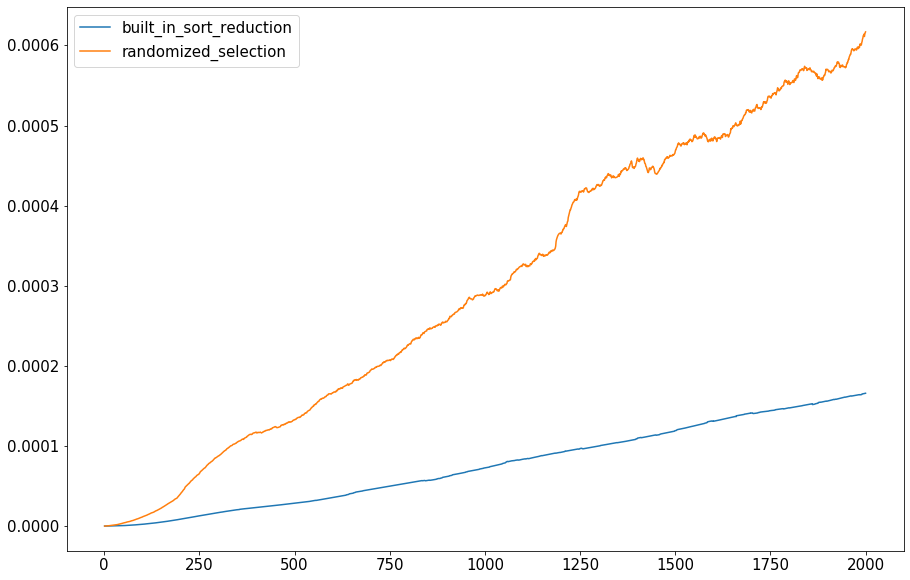

In [37]:
built_in_vs_randomized.calculate_time_multiple_lists(range_length=2000,
                                                             harmonization=True,
                                                             f_harmonization=200).plot(figsize=(15, 10))

The built-in `sorted` method for lists is so performant that it seems to outperform a linear complexity 😲 .